In [3]:
from qiskit import * ### Importing the library to our notebook
from qiskit_aer import AerSimulator
from qiskit_aer import AerProvider
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import MCXGate
%matplotlib inline

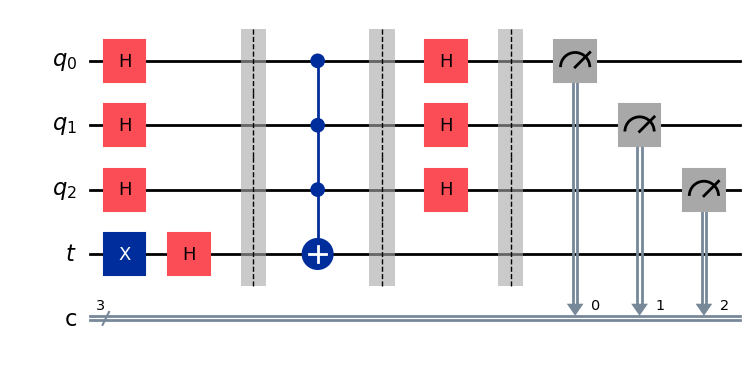

In [4]:
### Deutsch-Jozsa algorithm on f(x1,x2,x3)= x_1\xor x_3
#from qiskit.tools.monitor import job_monitor
#from qiskit import IBMQ
n=3 ### Number of variables in the underlying Boolean function
gate = MCXGate(3)
q = QuantumRegister(n, 'q')
t = QuantumRegister(1, 't')
c = ClassicalRegister(n, 'c')
qc_dj = QuantumCircuit(q,t,c)
### Initialization
for i in range(n):
    qc_dj.h(q[i])
qc_dj.x(t)
qc_dj.h(t)
qc_dj.barrier()
### Oracle for f(x1,x2,x3)=x_1\xor x_3
qc_dj.append(gate, [0, 1, 2, 3])
qc_dj.barrier()
#Final set of Hadamard gates
for i in range(n):
    qc_dj.h(q[i])
qc_dj.barrier()
#Final Measurement
qc_dj.measure(q,c)
qc_dj.draw(output='mpl')

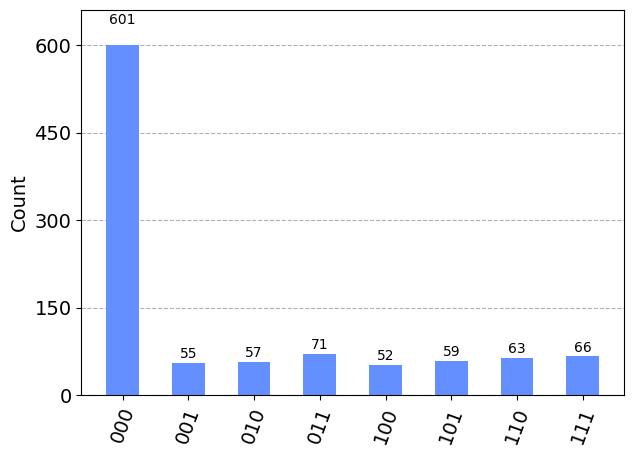

In [5]:
from qiskit.visualization import plot_histogram
prov = AerProvider()
simulator = prov.get_backend('qasm_simulator')

simulator = simulator.run(qc_dj).result()
counts = simulator.get_counts(qc_dj)
plot_histogram(counts)

In [6]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Sampler
 
service = QiskitRuntimeService(token="b5512469df0131b77b35a7c20a8ee35083402ff16cc0ad68f529bb44c91daebe4546e5e53a4931d092f0338bf295d61553cafb7805900e22aeb3b59764add3c5", channel="ibm_quantum")
session = Session(service=service, backend="ibmq_qasm_simulator")
sampler = Sampler(session=session)

/var/folders/dr/7jrw49755h70bsy03x6hy14c0000gn/T/ipykernel_88281/2759227616.py:10: DeprecationWarning: Circuits that do not match the target hardware definition will no longer be supported after March 1, 2024. See the transpilation documentation (https://docs.quantum.ibm.com/transpile) for instructions to transform circuits and the primitive examples (https://docs.quantum.ibm.com/run/primitives-examples) to see this coupled with operator transformations.
  res = sampler.run(qc_dj).result()


KeyboardInterrupt: 

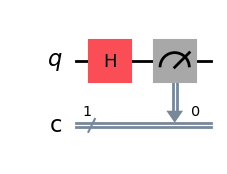

In [7]:
### Quantum True-Random Number Generator
q = QuantumRegister(1, 'q')
c = ClassicalRegister(1, 'c')
qtrng = QuantumCircuit(q,c)
qtrng.h(q[0])
qtrng.measure(q,c)
qtrng.draw(output='mpl')

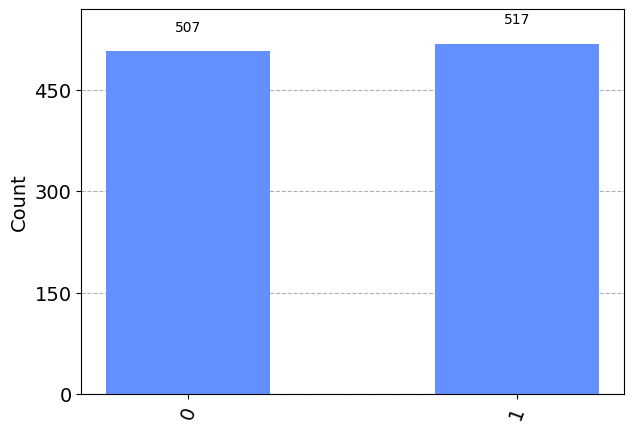

In [8]:
simulator = prov.get_backend('qasm_simulator')

simulator = simulator.run(qtrng).result()
counts = simulator.get_counts(qtrng)
plot_histogram(counts)

In [9]:
### Running QTRNG using real quantum machine (IBMQ_BELEM)
prov = AerProvider()
simulator = prov.get_backend('qasm_simulator')

res = sampler.run(qtrng).result()
plot_histogram(res.get_counts(qtrng))

/var/folders/dr/7jrw49755h70bsy03x6hy14c0000gn/T/ipykernel_88281/2918735537.py:5: DeprecationWarning: Circuits that do not match the target hardware definition will no longer be supported after March 1, 2024. See the transpilation documentation (https://docs.quantum.ibm.com/transpile) for instructions to transform circuits and the primitive examples (https://docs.quantum.ibm.com/run/primitives-examples) to see this coupled with operator transformations.
  res = sampler.run(qtrng).result()


AttributeError: 'SamplerResult' object has no attribute 'get_counts'